In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle
import os 

sys.path.append("..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple,
                                            count_experiment_runs,
                                            get_runs_paths)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)
from opdynamics.utils.plotting.plotting import heat_plot

***

Positive

In [3]:
params = parse_experiment_params("../experiments_params/uniform_positive_two_polarized_groups.json")
results = get_experiment_mean_data(params, "../results/uniform_positive_polarized_two_polarized_groups/")

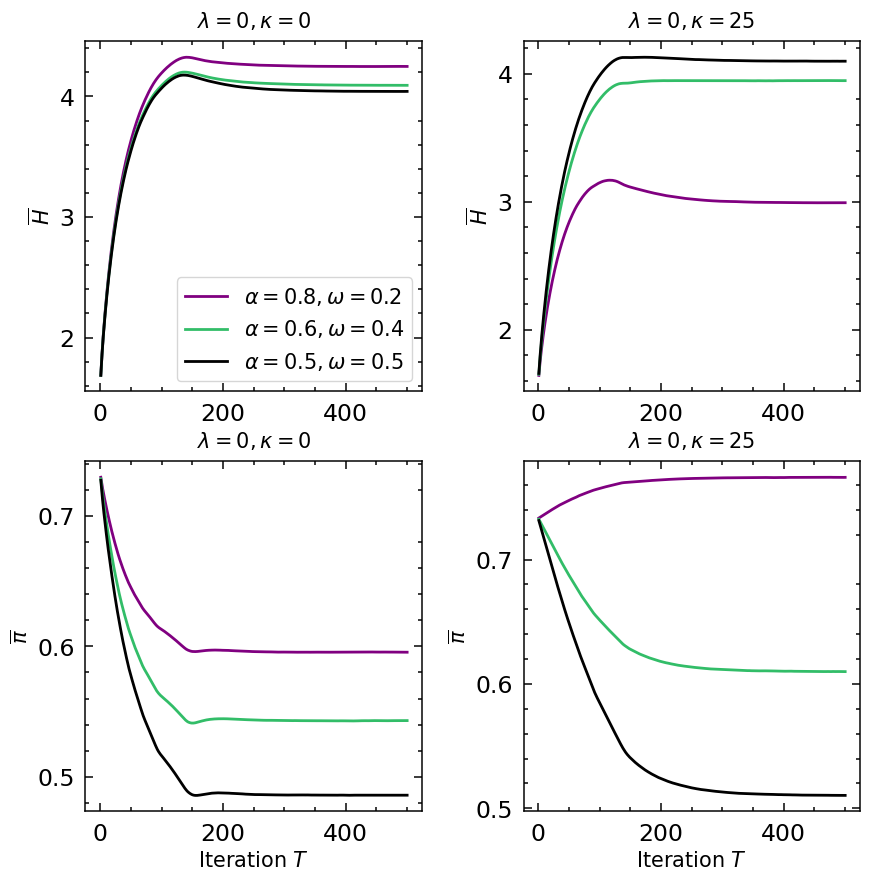

In [4]:
# parameters

nrows = 2
ncols = 2

titles = [
    r"$\lambda = 0, \kappa = 0$",
    r"$\lambda = 0, \kappa = 25$",
    r"$\lambda = 0, \kappa = 0$",
    r"$\lambda = 0, \kappa = 25$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = ""
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))
fig.subplots_adjust(wspace = 0.3)

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

axs[0][0].set_ylabel(r"$\overline{H}$")
axs[0][1].set_ylabel(r"$\overline{H}$")
axs[1][0].set_ylabel(r"$\overline{\pi}$")
axs[1][1].set_ylabel(r"$\overline{\pi}$")

# plot
line_width = 2

alpha_omega_color =  {
    (0.8, 0.2): "purple",
    (0.6, 0.4): "#32BD68",
    (0.5, 0.5): "black",
    (0.6, 0.2): "y",
    (0.4, 0.4): "g",
    (0.5, 0.2): "k",
    (0.5, 0.4): "r"
}

X = np.arange(1, 500 + 1)

valid_combinations = {(0.8, 0.2), (0.6, 0.4), (0.5, 0.5)}

selected_params = [
    x for x in params if
    x["kappa"] == 0 and x["lambd"]  == 0
    and (x["alpha"], x["omega"]) in valid_combinations
]
for p in selected_params:
    axs[0][0].plot(
        X,
        results[make_tuple(p, True)]["entropy"],
        c = alpha_omega_color[(p["alpha"], p["omega"])],
        linewidth = line_width,
        label = r"$\alpha = {}, \omega = {}$".format(p["alpha"], p["omega"])
    )

selected_params = [
    x for x in params if
    x["kappa"] == 25 and x["lambd"]  == 0
    and (x["alpha"], x["omega"]) in valid_combinations
]
for p in selected_params:
    axs[0][1].plot(
        X,
        results[make_tuple(p, True)]["entropy"],
        c = alpha_omega_color[(p["alpha"], p["omega"])],
        linewidth = line_width,
        label = r"$\alpha = {}, \omega = {}$".format(p["alpha"], p["omega"])
    )

selected_params = [
    x for x in params if
    x["kappa"] == 0 and x["lambd"]  == 0
    and (x["alpha"], x["omega"]) in valid_combinations
]
for p in selected_params:
    axs[1][0].plot(
        X,
        results[make_tuple(p, True)]["polarity"],
        c = alpha_omega_color[(p["alpha"], p["omega"])],
        linewidth = line_width,
        label = r"$\alpha = {}, \omega = {}$".format(p["alpha"], p["omega"])
    )

selected_params = [
    x for x in params if
    x["kappa"] == 25 and x["lambd"]  == 0
    and (x["alpha"], x["omega"]) in valid_combinations
]
for p in selected_params:
    axs[1][1].plot(
        X,
        results[make_tuple(p, True)]["polarity"],
        c = alpha_omega_color[(p["alpha"], p["omega"])],
        linewidth = line_width,
        label = r"$\alpha = {}, \omega = {}$".format(p["alpha"], p["omega"])
    )


axs[0][0].legend(loc = 'lower right', fontsize = 15)

0.3293913934426229


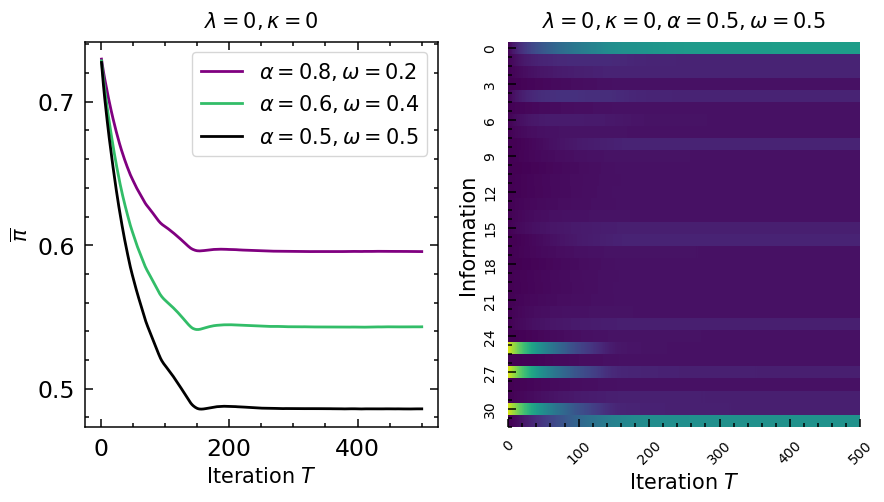

In [9]:
from matplotlib.ticker import MaxNLocator

nrows = 1
ncols = 2

titles = [
    r"$\lambda = 0, \kappa = 0$",
    r"$\lambda = 0, \kappa = 0, \alpha = 0.5, \omega = 0.5$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = ""
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = ""
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))
fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

# ************

alpha_omega_color =  {
    (0.8, 0.2): "purple",
    (0.6, 0.4): "#32BD68",
    (0.5, 0.5): "black",
    (0.6, 0.2): "y",
    (0.4, 0.4): "g",
    (0.5, 0.2): "k",
    (0.5, 0.4): "r"
}


selected_params = [
    x for x in params if
    x["kappa"] == 0 and x["lambd"]  == 0
    and (x["alpha"], x["omega"]) in valid_combinations
]
for p in selected_params:
    axs[0].plot(
        X,
        results[make_tuple(p, True)]["polarity"],
        c = alpha_omega_color[(p["alpha"], p["omega"])],
        linewidth = line_width,
        label = r"$\alpha = {}, \omega = {}$".format(p["alpha"], p["omega"])
    )
axs[0].set_ylabel(r"$\overline{\pi}$")
axs[0].set_xlabel(r"Iteration $T$")



param = selected_params = [x for x in params if x['kappa'] == 0 and x['lambd'] == 0 and x['alpha'] == 0.5 and x["omega"] == 0.5].pop()
data = results[make_tuple(param, True)]
print(data['distribution'][:500].max())
_, ax = heat_plot(data['distribution'], cmap = 'viridis', fig = fig, ax = axs[1], vmax = 0.35)

axs[1].set_ylabel("Information")
axs[1].set_xlabel(r"Iteration $T$")

axs[1].tick_params(
    which = 'both',
    top = False,
    right = False,
    labelsize = 10
)

axs[1].xaxis.set_major_locator(MaxNLocator(5))
new_tick_locations = axs[1].get_xticks()
ticks = [int(x) for x in new_tick_locations]
axs[1].set_xticks(new_tick_locations)
axs[1].set_xticklabels(ticks, rotation = 45)


axs[0].legend(loc = 'upper right', fontsize = 15)

***

Negative

In [8]:
params = parse_experiment_params("../experiments_params/uniform_negative_two_polarized_groups.json")
results = get_experiment_mean_data(params, "../results/uniform_negative_polarized_two_polarized_groups/")

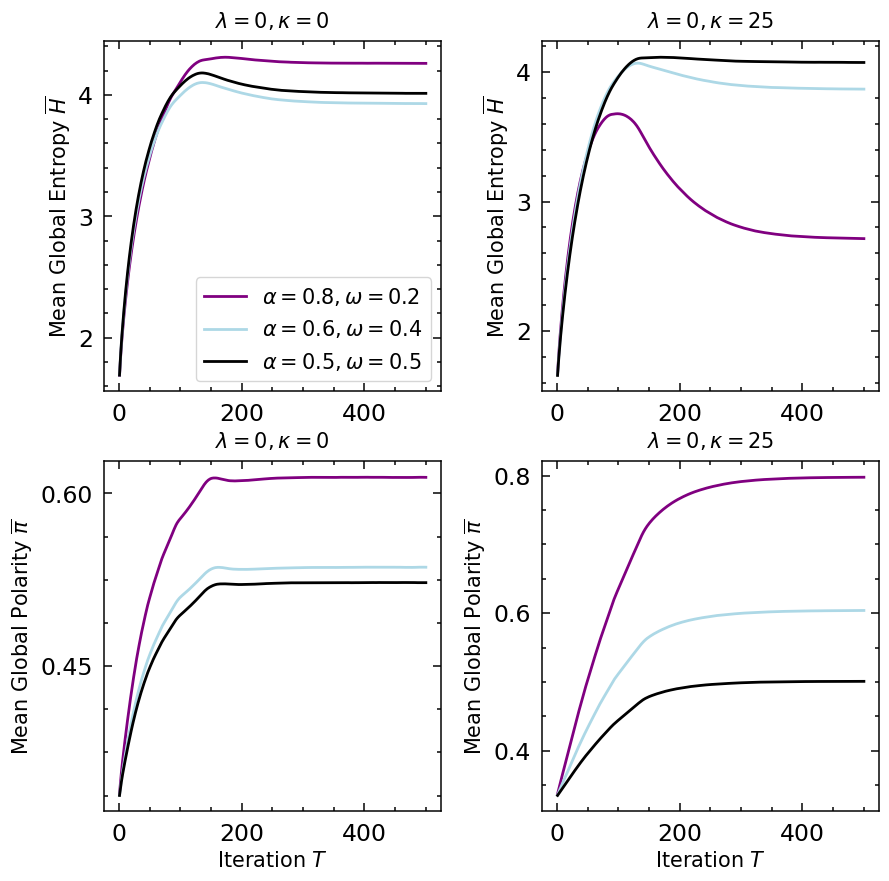

In [9]:
# parameters

nrows = 2
ncols = 2

titles = [
    r"$\lambda = 0, \kappa = 0$",
    r"$\lambda = 0, \kappa = 25$",
    r"$\lambda = 0, \kappa = 0$",
    r"$\lambda = 0, \kappa = 25$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = ""
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))
fig.subplots_adjust(wspace = 0.3)

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

axs[0][0].set_ylabel(r"Mean Global Entropy $\overline{H}$")
axs[0][1].set_ylabel(r"Mean Global Entropy $\overline{H}$")
axs[1][0].set_ylabel(r"Mean Global Polarity $\overline{\pi}$")
axs[1][1].set_ylabel(r"Mean Global Polarity $\overline{\pi}$")

# plot
line_width = 2

alpha_omega_color =  {
    (0.8, 0.2): "purple",
    (0.6, 0.4): "lightblue",
    (0.5, 0.5): "black",
    (0.6, 0.2): "y",
    (0.4, 0.4): "g",
    (0.5, 0.2): "k",
    (0.5, 0.4): "r"
}

X = np.arange(1, 500 + 1)

valid_combinations = {(0.8, 0.2), (0.6, 0.4), (0.5, 0.5)}

selected_params = [
    x for x in params if
    x["kappa"] == 0 and x["lambd"]  == 0
    and (x["alpha"], x["omega"]) in valid_combinations
]
for p in selected_params:
    axs[0][0].plot(
        X,
        results[make_tuple(p, True)]["entropy"],
        c = alpha_omega_color[(p["alpha"], p["omega"])],
        linewidth = line_width,
        label = r"$\alpha = {}, \omega = {}$".format(p["alpha"], p["omega"])
    )

selected_params = [
    x for x in params if
    x["kappa"] == 25 and x["lambd"]  == 0
    and (x["alpha"], x["omega"]) in valid_combinations
]
for p in selected_params:
    axs[0][1].plot(
        X,
        results[make_tuple(p, True)]["entropy"],
        c = alpha_omega_color[(p["alpha"], p["omega"])],
        linewidth = line_width,
        label = r"$\alpha = {}, \omega = {}$".format(p["alpha"], p["omega"])
    )

selected_params = [
    x for x in params if
    x["kappa"] == 0 and x["lambd"]  == 0
    and (x["alpha"], x["omega"]) in valid_combinations
]
for p in selected_params:
    axs[1][0].plot(
        X,
        results[make_tuple(p, True)]["polarity"],
        c = alpha_omega_color[(p["alpha"], p["omega"])],
        linewidth = line_width,
        label = r"$\alpha = {}, \omega = {}$".format(p["alpha"], p["omega"])
    )

selected_params = [
    x for x in params if
    x["kappa"] == 25 and x["lambd"]  == 0
    and (x["alpha"], x["omega"]) in valid_combinations
]
for p in selected_params:
    axs[1][1].plot(
        X,
        results[make_tuple(p, True)]["polarity"],
        c = alpha_omega_color[(p["alpha"], p["omega"])],
        linewidth = line_width,
        label = r"$\alpha = {}, \omega = {}$".format(p["alpha"], p["omega"])
    )


axs[0][0].legend(loc = 'lower right', fontsize = 15)

0.3303663504464286
0.3293913934426229


[Text(0.0, 0, '0'),
 Text(100.0, 0, '100'),
 Text(200.0, 0, '200'),
 Text(300.0, 0, '300'),
 Text(400.0, 0, '400'),
 Text(500.0, 0, '500')]

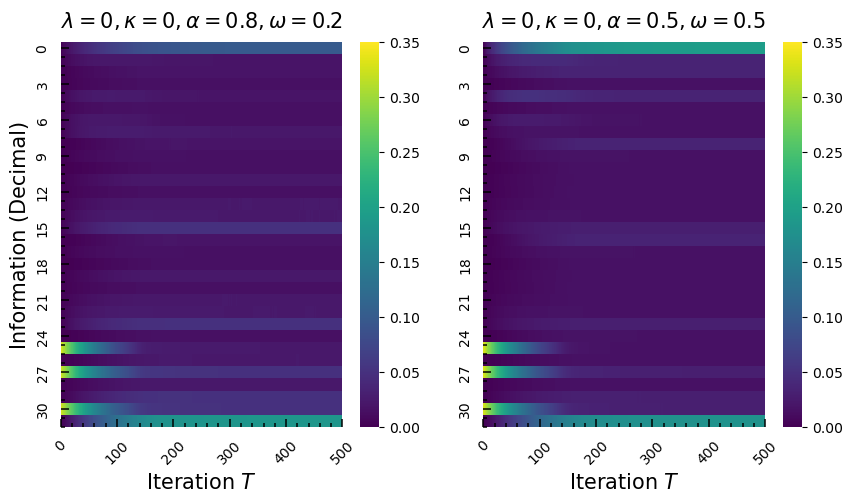

In [7]:
from matplotlib.ticker import MaxNLocator

nrows = 1
ncols = 2

titles = [
    r"$\lambda = 0, \kappa = 0, \alpha = 0.8, \omega = 0.2$",
    r"$\lambda = 0, \kappa = 0, \alpha = 0.5, \omega = 0.5$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = ""
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = ""
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))
fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

# ************

param = selected_params = [x for x in params if x['kappa'] == 0 and x['lambd'] == 0 and x['alpha'] == 0.8 and x["omega"] == 0.2].pop()
data = results[make_tuple(param, True)]
print(data['distribution'][:500].max())
_, ax = heat_plot(data['distribution'][:500], cmap = 'viridis', fig = fig, ax = axs[0], cbar = True, vmax = 0.35)

axs[0].set_ylabel("Information (Decimal)")
axs[0].set_xlabel(r"Iteration $T$")

axs[0].tick_params(
    which = 'both',
    top = False,
    right = False,
    labelsize = 10
)

axs[0].xaxis.set_major_locator(MaxNLocator(5))
new_tick_locations = axs[0].get_xticks()
ticks = [int(x) for x in new_tick_locations]
axs[0].set_xticks(new_tick_locations)
axs[0].set_xticklabels(ticks, rotation = 45)




param = selected_params = [x for x in params if x['kappa'] == 0 and x['lambd'] == 0 and x['alpha'] == 0.5 and x["omega"] == 0.5].pop()
data = results[make_tuple(param, True)]
print(data['distribution'][:500].max())
_, ax = heat_plot(data['distribution'][:500], cmap = 'viridis', fig = fig, ax = axs[1], cbar = True, vmax = 0.35)

# axs[1].set_ylabel("Information (Decimal)")
axs[1].set_xlabel(r"Iteration $T$")

axs[1].tick_params(
    which = 'both',
    top = False,
    right = False,
    labelsize = 10
)

axs[1].xaxis.set_major_locator(MaxNLocator(5))
new_tick_locations = axs[1].get_xticks()
ticks = [int(x) for x in new_tick_locations]
axs[1].set_xticks(new_tick_locations)
axs[1].set_xticklabels(ticks, rotation = 45)